# **Network 1 - original**

In [1]:
import networkx as nx 
import pylab as plt 
import numpy as np
import collections
import matplotlib.pyplot as plt

**1. Description of the network**
* Name: Facebook Food Pages
* Category: Sparse Networks
* Collection: Social Networks
* Type: undirected network
* N = 620 nodes as facebook pages names
* L = 2102 edges between mutually liked pages

In [3]:
edges_file_path = '/kaggle/input/fb-pages-food/fb-pages-food.edges'
G = nx.read_edgelist(edges_file_path, create_using=nx.Graph(),delimiter =',', nodetype=int, encoding = 'utf-8')

In [4]:
N = G.number_of_nodes()
L = G.number_of_edges()
print("Number of nodes: ", N) 
print("Number of links: ", L) 
print() 

Number of nodes:  620
Number of links:  2102



**2 Network properties**

The network is connected, so it has only 1 connected component
* Average degree: 6.78
* Size of the largest connected component: 620
* Diameter: 17
* Average shortest path length: 5.088696
* Average clustering coefficient: 0.330897

In [5]:
degrees = [G.degree[node] for node in G]

kmin = np.min(degrees)
kmax = np.max(degrees)
kavg = np.mean(degrees)

print("Average degree=", kavg)
print("Min degree=", kmin)
print("Max degree=", kmax)

Average degree= 6.780645161290322
Min degree= 1
Max degree= 134


Avg degree is closer to the min degree, while max degree is much higher than min/mean (skewed degree distribution) => first indication the network could be a power-low (or some heavy-tailed distribution), but this is not yet fully confirmed.

In [6]:
nx.is_connected(G)

True

In [7]:
diameter = nx.diameter(G)
print("Diameter of G:", diameter)

nx.shortest_path(G)
average_shortest_path_length = nx.average_shortest_path_length(G)
print("Average shortest path length:", average_shortest_path_length)

average_clustering_coefficient = nx.average_clustering(G)
print("Average clustering coefficient:", average_clustering_coefficient)

edge_density = nx.density(G) # no of edges / maximum possible edges
print("Edge density:", edge_density)

Diameter of G: 17
Average shortest path length: 5.088696649121893
Average clustering coefficient: 0.3308970263553271
Edge density: 0.0109541925061233


**Is the network highly clustered?**

avg clustering coeff >> edge density, moderate to high level of clustering, but it is sparse overall (because of the low edge density)

**3. Plots**
* degree distribution
* clustering coefficient distribution
* betweenness centrality distribution 
* connected components size distribution

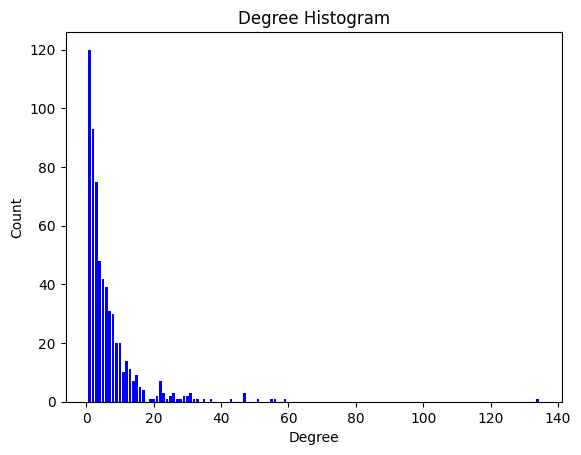

In [8]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True) # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
plt.bar(deg, cnt, width=0.80, color="b")
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

**Degree Histogram Analysis**
* majority of nodes have a low degree
* there are a few nodes with a very high degree. 
* distribution may suggest a scale-free property, where some nodes act as highly connected hubs

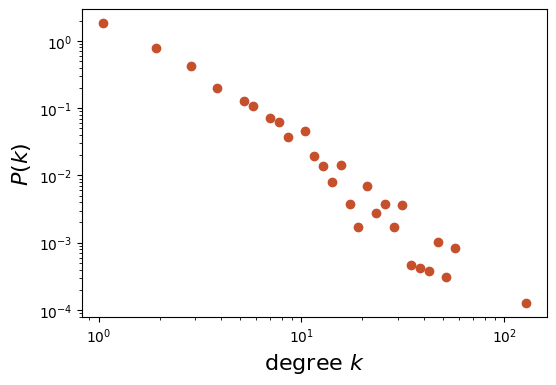

In [12]:
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=50)
density, _ = np.histogram(degrees, bins=bin_edges, density=True)
fig = plt.figure(figsize=(6,4))
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)
plt.loglog(x, density, marker='o', linestyle='none', color='#c7502c')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)
plt.show()

**Log Log Plot Analysis**
* from earlier we know that the avg degree is closer to the min degree
* shows a linear trend on the log-log scale, especially in the tail (higher-degree part) => heavy-tailed distribution, characteristic of power-law behavior. 
* however, some deviation from a straight line can be observed => the network follows a power-law only approximately or for a certain range of degrees.

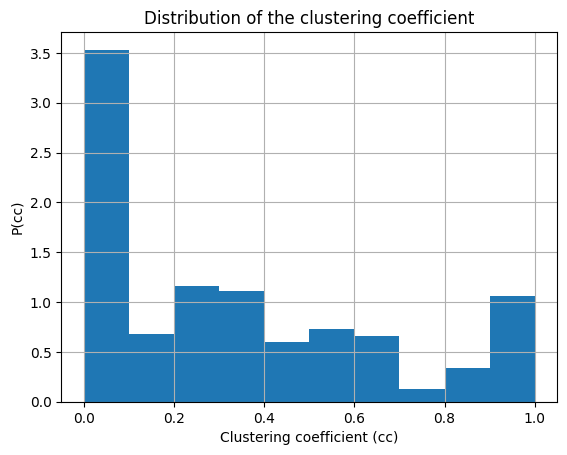

In [17]:
cc = nx.clustering(G)
vcc = []
# clustering coeff for each node in the network
for n in G.nodes():
    vcc.append(nx.clustering(G, n))
vcc = np.array(vcc)

plt.hist(cc.values(), bins=10, density=True)
plt.grid(True)
plt.title("Distribution of the clustering coefficient")
plt.xlabel("Clustering coefficient (cc)")
plt.ylabel("P(cc)")
plt.show()

**Clustering Coeff Plot Analysis**

* the nodes with a clustering coefficient of 0 do not form triangles with their neighbors 
* there are also nodes with higher clustering coefficients, suggesting that many nodes do tend to form triangles with their neighbors
* the spread of values indicates heterogeneity in the local clustering of the network

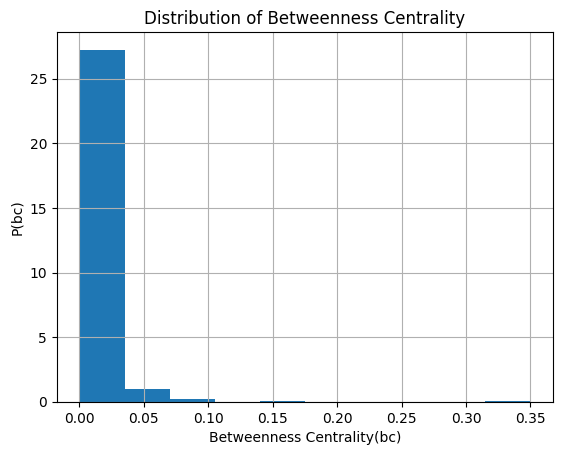

In [21]:
betweenness_dict = nx.betweenness_centrality(G) 
betweenness_values = list(betweenness_dict.values()) 

plt.hist(betweenness_values, bins=10, density=True) 
plt.title("Distribution of Betweenness Centrality")
plt.xlabel("Betweenness Centrality(bc)")
plt.ylabel("P(bc)")
plt.grid(True)
plt.show()

**Betweenness Centrality Plot Analysis**

* distribution is quite skewed, with a large number of nodes having a low betweenness centrality value, which is typical for many real-world networks. 
* most nodes are not often on the shortest paths between other nodes, with only a few nodes having higher betweenness centrality

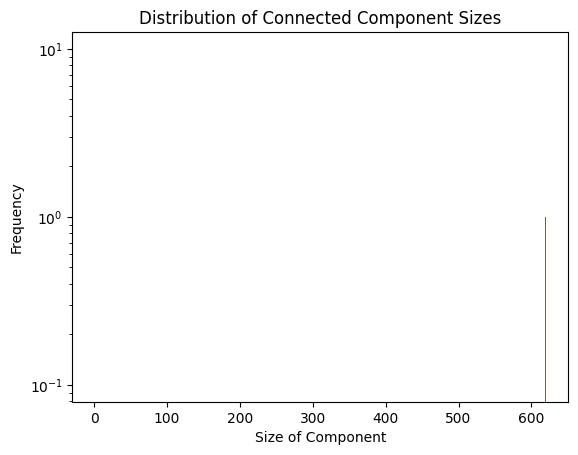

In [22]:
connected_components = sorted(nx.connected_components(G), key=len, reverse=True)
component_sizes = [len(c) for c in connected_components]

plt.hist(component_sizes, bins=range(1, max(component_sizes)+1), density=True)
plt.title("Distribution of Connected Component Sizes")
plt.xlabel("Size of Component")
plt.ylabel("Frequency")
plt.yscale('log')
plt.show()

**Connected Component Plot Analysis**
* the network has only one connected component, so we see only one bar on the plot
* this is not meaningful for our network


**4. Most important nodes according to different measures**



In [28]:
degrees = dict(G.degree())

# Node with maximum degree
max_degree_node = max(degrees, key=degrees.get)

# Node with maximum clustering coefficient
clustering = nx.clustering(G)
max_clustering_node = max(clustering, key=clustering.get)

# Node with the highest degree centrality
degree_centrality = nx.degree_centrality(G)
max_degree_node = max(degree_centrality, key=degree_centrality.get)

# Node with the highest betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)
max_betweenness_node = max(betweenness_centrality, key=betweenness_centrality.get)

# Node with the highest closeness centrality
closeness_centrality = nx.closeness_centrality(G)
max_closeness_node = max(closeness_centrality, key=closeness_centrality.get)

# Node with the highest eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)
max_eigenvector_node = max(eigenvector_centrality, key=eigenvector_centrality.get)

print(f"Node with the highest degree: {max_degree_node} (Degree: {degrees[max_degree_node]})")
print(f"Node with the highest clustering coefficient: {max_clustering_node} (Clustering Coefficient: {clustering[max_clustering_node]})")
print(f"Node with the highest degree centrality: {max_degree_node} (Degree Centrality: {degree_centrality[max_degree_node]})")
print(f"Node with the highest betweenness centrality: {max_betweenness_node} (Betweenness Centrality: {betweenness_centrality[max_betweenness_node]})")
print(f"Node with the highest closeness centrality: {max_closeness_node} (Closeness Centrality: {closeness_centrality[max_closeness_node]})")
print(f"Node with the highest eigenvector centrality: {max_eigenvector_node} (Eigenvector Centrality: {eigenvector_centrality[max_eigenvector_node]})")

Node with the highest degree: 265 (Degree: 134)
Node with the highest clustering coefficient: 1 (Clustering Coefficient: 1.0)
Node with the highest degree centrality: 265 (Degree Centrality: 0.21647819063004847)
Node with the highest betweenness centrality: 265 (Betweenness Centrality: 0.34990766617377767)
Node with the highest closeness centrality: 265 (Closeness Centrality: 0.33137044967880086)
Node with the highest eigenvector centrality: 265 (Eigenvector Centrality: 0.32575217835267967)


* node 265 seems to be an extremely important node, likely acting as a central hub
* node 1 has a perfect clustering coefficient and it could be a local leader within its community

**5. Visualization of the network**

- **Basic Network Visualization**: initial exploration of the network to understand its general structure and connectivity
- **Circular Layout Visualization**: circular layout, useful for spotting symmetries
- **Network Visualization with Node Degree Size**: useful for quickly identifying important nodes or hubs within the network
- **Community Detection Visualization**: segregates communities within the network
- **Betweenness Centrality Visualization**: emphasizes nodes that serve as critical connectors or bridges within the network

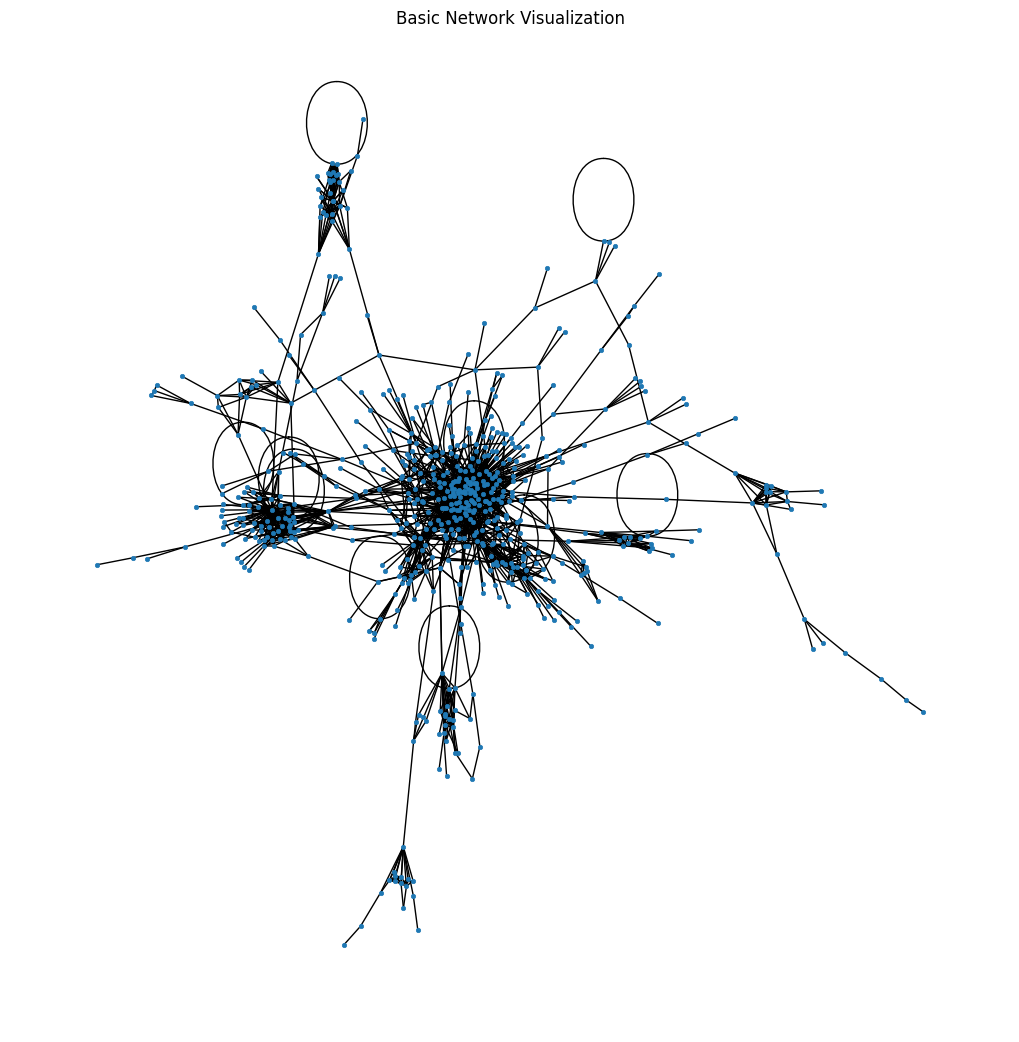

In [80]:
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=False, node_size=10, linewidths=0.5)
plt.title("Basic Network Visualization")
plt.show()


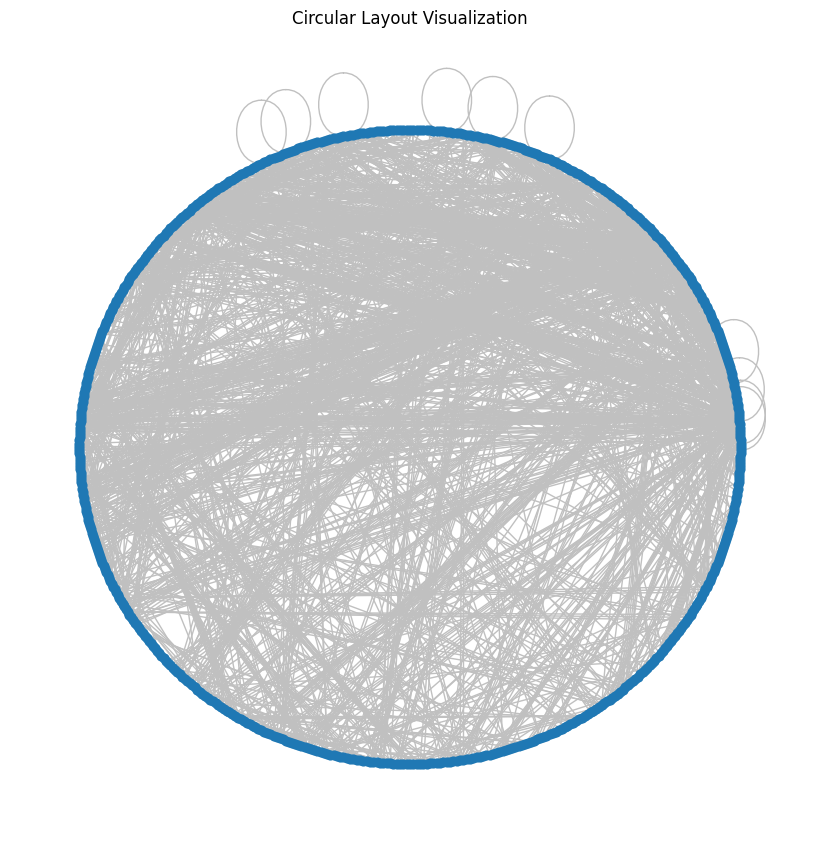

In [82]:
fig = plt.figure(figsize=(8, 8))
nx.draw_circular(G, node_size=40, with_labels=False, edge_color='silver')
plt.title("Circular Layout Visualization")
plt.show()


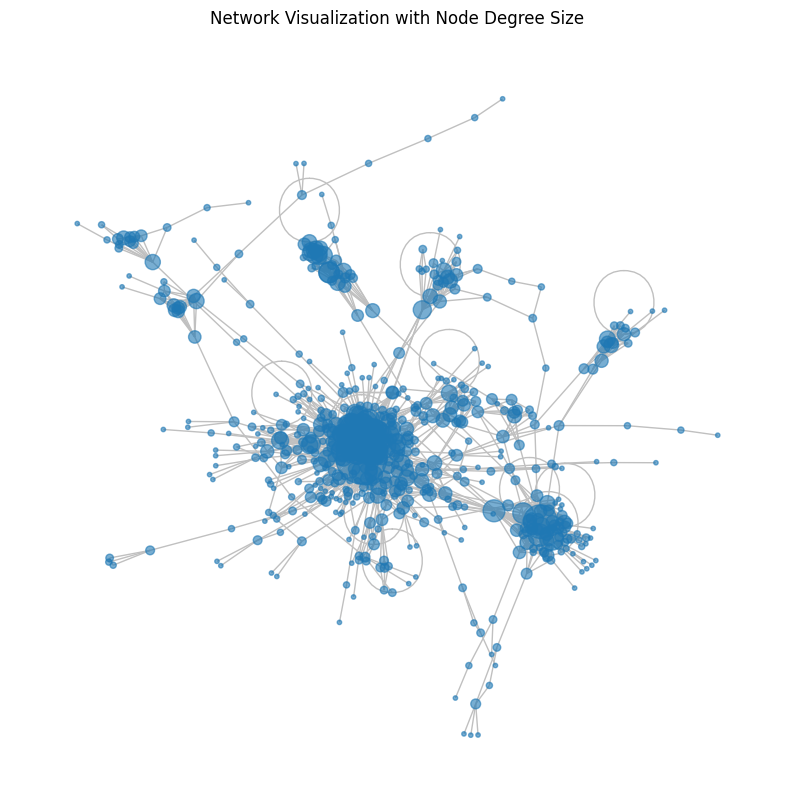

In [83]:
node_degree = dict(G.degree())

plt.figure(figsize=(10, 10))

pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_size=[v * 10 for v in node_degree.values()], alpha=0.6)
nx.draw_networkx_edges(G, pos, edge_color='silver')

plt.axis('off')
plt.title("Network Visualization with Node Degree Size")
plt.show()


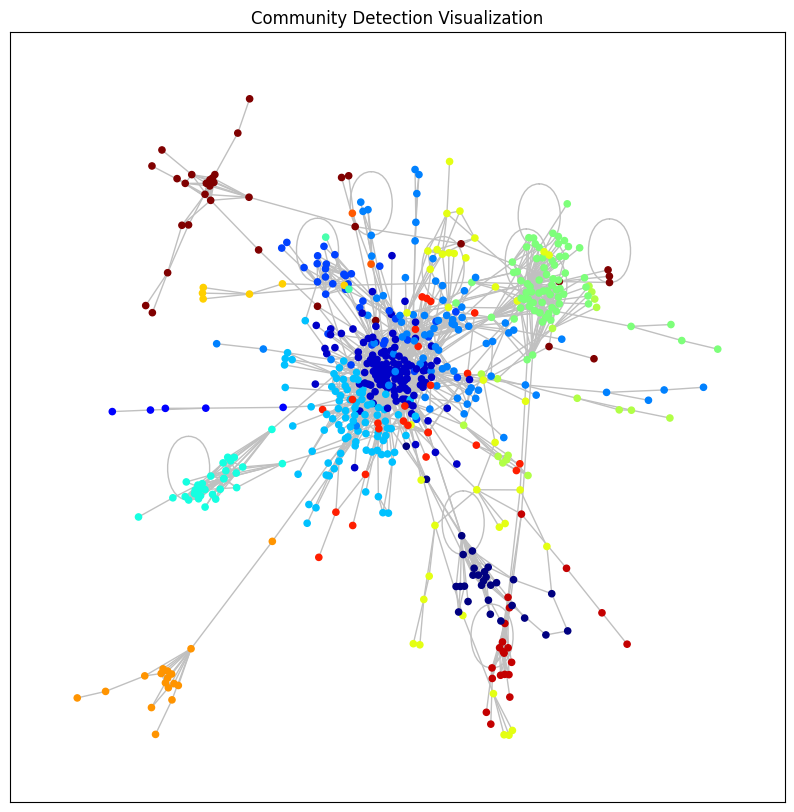

In [84]:
import community as community_louvain

partition = community_louvain.best_partition(G)
community_colors = [partition[node] for node in G.nodes()]

layout = nx.spring_layout(G, seed=42)

plt.figure(figsize=(10, 10))

nx.draw_networkx(G, pos=layout, node_color=community_colors, with_labels=False,
                 node_size=20, edge_color="silver", cmap=plt.cm.jet)
plt.title("Community Detection Visualization")
plt.show()


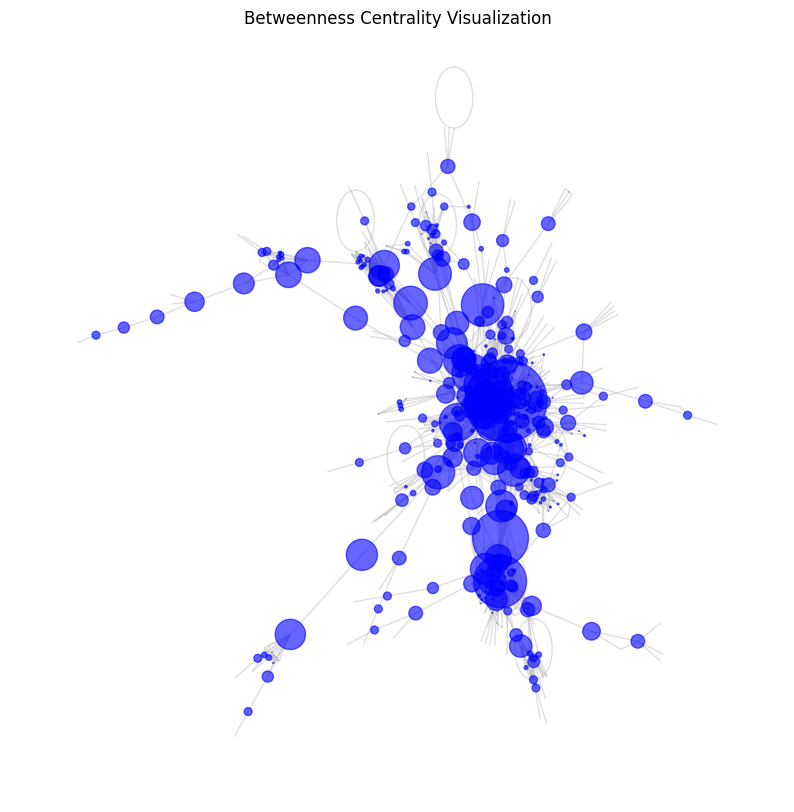

In [77]:
betweenness = nx.betweenness_centrality(G)
node_size = [v * 10000 for v in betweenness.values()]

pos = nx.spring_layout(G)
plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='blue', alpha=0.6)
nx.draw_networkx_edges(G, pos, edge_color='silver', alpha=0.5)

plt.title("Betweenness Centrality Visualization")
plt.axis('off') 
plt.show()
